In [9]:
# general imports
import torch as th
import torch.nn.functional as F
from torch_geometric.loader import DataLoader as PygDataLoader
from torch.utils.data import SequentialSampler

In [10]:
import torch
from torch.nn import CrossEntropyLoss
from torch_geometric.data import DataLoader
from dataloader import NCaltech101Best
from model import GraphRes
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
# params
batch_size= 16
lr=         10e-3 # decreases by 10 after each 20 epochs
loss=       th.nn.CrossEntropyLoss
batchsize=  16
K=          10 # data subsampling
nclasses=   100



In [12]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device:", device)
print(torch.cuda.get_device_name(0))

def validate(m, i):
    dataset = NCaltech101Best(i, './data/storage/', mode='test')
    loader = PygDataLoader(dataset, batch_size=16, shuffle=True)
    print(dataset.data_dir)
    accuracy = []
    correct = 0
    for data in tqdm(loader):
        data = data.to(device)
        output = m(data)
        pred = output.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    
    accuracy.append(correct / (len(loader) * 16))
    print("The accuracy of the model is ", accuracy[len(accuracy) - 1])



sample_sizes = [500, 1000, 5000]
network_variations = [0,1,2]
# k = 1000
acc_per_hyper_param = [[]]
loss_per_hyper_param = [[]]
for n in network_variations:
    for k in sample_sizes: 
    # Initialize dataset and data loader
        dataset = NCaltech101Best(k, './data/storage/', mode='train')
        loader = PygDataLoader(dataset, batch_size=16, shuffle=True)
        print("example datapoint:", dataset.get(0))
        print(dataset.data_dir)

        # Initialize model
        model_input_shape = th.tensor((240, 180) + (3, ), device=device)
        print("INPUT SHAPE:", model_input_shape)

        model = GraphRes(n, 'ncaltech101', model_input_shape, 101).to(device) #When iterating over loss_per_hyper_param = []

        # Define loss function and optimizer
        criterion = CrossEntropyLoss().cuda()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        acc = []
        # Define training loop
        def train():
            model.train()
            losses = []
            correct = 0
            i = 0
            for data in tqdm(loader):
                data = data.to(device)
                optimizer.zero_grad()
                output = model(data)

                y = F.one_hot(data.y, num_classes=101).type(torch.cuda.FloatTensor)
                loss = criterion(output, y)
                losses.append(loss)
                loss.backward()
                optimizer.step()
                pred = output.max(dim=1)[1]
                correct += pred.eq(data.y).sum().item()
                i += 1

            
            acc.append(correct / (len(loader) * 16))
            print(acc[len(acc) - 1])
            validate(model, k)
            return losses

        # Run training loop for 10 epochs
        all_losses = []
        for epoch in range(20):
            print("computing epoch", epoch)
            losses = train()
            all_losses.append(losses)

        acc_per_hyper_param.append(acc)
        loss_per_hyper_param.append(all_losses)
        
        validate(model, k)




using device: cuda
Quadro P1000
loading classes...


Processing...
Done!
100%|██████████| 101/101 [00:04<00:00, 23.78it/s]


example datapoint: Data(x=[500, 1], y=0, pos=[500, 3], edge_index=[2, 2263], edge_attr=[2263, 3])
./data/storage/
INPUT SHAPE: tensor([240, 180,   3], device='cuda:0')
computing epoch 0


100%|██████████| 434/434 [11:52<00:00,  1.64s/it]

0.19556451612903225
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:05<00:00, 19.40it/s]


./data/storage/


100%|██████████| 55/55 [00:52<00:00,  1.06it/s]


The accuracy of the model is  0.22045454545454546
computing epoch 1


100%|██████████| 434/434 [12:49<00:00,  1.77s/it]

0.29147465437788017
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:04<00:00, 25.13it/s]


./data/storage/


100%|██████████| 55/55 [00:37<00:00,  1.45it/s]


The accuracy of the model is  0.29318181818181815
computing epoch 2


100%|██████████| 434/434 [13:04<00:00,  1.81s/it]

0.34389400921658986
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:04<00:00, 21.75it/s]


./data/storage/


100%|██████████| 55/55 [00:50<00:00,  1.10it/s]


The accuracy of the model is  0.3431818181818182
computing epoch 3


100%|██████████| 434/434 [11:11<00:00,  1.55s/it]

0.3873847926267281
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 35.06it/s]


./data/storage/


100%|██████████| 55/55 [00:33<00:00,  1.64it/s]


The accuracy of the model is  0.3806818181818182
computing epoch 4


100%|██████████| 434/434 [09:18<00:00,  1.29s/it]

0.42122695852534564
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 47.88it/s]


./data/storage/


100%|██████████| 55/55 [00:30<00:00,  1.79it/s]


The accuracy of the model is  0.3931818181818182
computing epoch 5


100%|██████████| 434/434 [09:00<00:00,  1.25s/it]

0.441676267281106
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 48.46it/s]


./data/storage/


100%|██████████| 55/55 [00:29<00:00,  1.83it/s]


The accuracy of the model is  0.4102272727272727
computing epoch 6


100%|██████████| 434/434 [08:46<00:00,  1.21s/it]

0.45305299539170507
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 43.60it/s]


./data/storage/


100%|██████████| 55/55 [00:26<00:00,  2.09it/s]


The accuracy of the model is  0.42272727272727273
computing epoch 7


100%|██████████| 434/434 [08:45<00:00,  1.21s/it]

0.48027073732718895
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 45.26it/s]


./data/storage/


100%|██████████| 55/55 [00:28<00:00,  1.95it/s]


The accuracy of the model is  0.42954545454545456
computing epoch 8


100%|██████████| 434/434 [08:34<00:00,  1.19s/it]

0.4788306451612903
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 45.95it/s]


./data/storage/


100%|██████████| 55/55 [00:27<00:00,  1.99it/s]


The accuracy of the model is  0.4318181818181818
computing epoch 9


100%|██████████| 434/434 [08:31<00:00,  1.18s/it]

0.4807027649769585
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 50.18it/s]


./data/storage/


100%|██████████| 55/55 [00:26<00:00,  2.09it/s]


The accuracy of the model is  0.42727272727272725
computing epoch 10


100%|██████████| 434/434 [08:27<00:00,  1.17s/it]

0.49121543778801846
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:01<00:00, 53.22it/s]


./data/storage/


100%|██████████| 55/55 [00:25<00:00,  2.20it/s]


The accuracy of the model is  0.44545454545454544
computing epoch 11


100%|██████████| 434/434 [08:21<00:00,  1.16s/it]

0.5084965437788018
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:01<00:00, 50.53it/s]


./data/storage/


100%|██████████| 55/55 [00:24<00:00,  2.23it/s]


The accuracy of the model is  0.4318181818181818
computing epoch 12


100%|██████████| 434/434 [08:31<00:00,  1.18s/it]

0.5126728110599078
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 45.06it/s]


./data/storage/


100%|██████████| 55/55 [00:25<00:00,  2.18it/s]


The accuracy of the model is  0.4329545454545455
computing epoch 13


100%|██████████| 434/434 [08:45<00:00,  1.21s/it]

0.5158410138248848
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 41.11it/s]


./data/storage/


100%|██████████| 55/55 [00:31<00:00,  1.75it/s]


The accuracy of the model is  0.44545454545454544
computing epoch 14


100%|██████████| 434/434 [09:15<00:00,  1.28s/it]

0.5293778801843319
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 43.85it/s]


./data/storage/


100%|██████████| 55/55 [00:30<00:00,  1.82it/s]


The accuracy of the model is  0.4590909090909091
computing epoch 15


100%|██████████| 434/434 [09:20<00:00,  1.29s/it]

0.5347062211981567
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 42.98it/s]


./data/storage/


100%|██████████| 55/55 [00:30<00:00,  1.80it/s]


The accuracy of the model is  0.43863636363636366
computing epoch 16


100%|██████████| 434/434 [08:46<00:00,  1.21s/it]

0.5380184331797235
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:01<00:00, 50.69it/s]


./data/storage/


100%|██████████| 55/55 [00:24<00:00,  2.20it/s]


The accuracy of the model is  0.46704545454545454
computing epoch 17


100%|██████████| 434/434 [08:28<00:00,  1.17s/it]

0.5450748847926268
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 49.46it/s]


./data/storage/


100%|██████████| 55/55 [00:26<00:00,  2.11it/s]


The accuracy of the model is  0.47613636363636364
computing epoch 18


100%|██████████| 434/434 [08:42<00:00,  1.20s/it]

0.549971198156682
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:01<00:00, 54.80it/s]


./data/storage/


100%|██████████| 55/55 [00:25<00:00,  2.19it/s]


The accuracy of the model is  0.4693181818181818
computing epoch 19


100%|██████████| 434/434 [08:21<00:00,  1.16s/it]

0.5547235023041475
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:01<00:00, 53.01it/s]


./data/storage/


100%|██████████| 55/55 [00:25<00:00,  2.15it/s]

The accuracy of the model is  0.45454545454545453
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 49.55it/s]


./data/storage/


100%|██████████| 55/55 [00:23<00:00,  2.33it/s]

The accuracy of the model is  0.4659090909090909
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 49.68it/s]


example datapoint: Data(x=[1000, 1], y=0, pos=[1000, 3], edge_index=[2, 5658], edge_attr=[5658, 3])
./data/storage/
INPUT SHAPE: tensor([240, 180,   3], device='cuda:0')
computing epoch 0


100%|██████████| 434/434 [14:48<00:00,  2.05s/it]

0.2224942396313364
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 43.58it/s]


./data/storage/


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


The accuracy of the model is  0.26931818181818185
computing epoch 1


100%|██████████| 434/434 [15:21<00:00,  2.12s/it]

0.32027649769585254
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 39.13it/s]


./data/storage/


100%|██████████| 55/55 [00:37<00:00,  1.47it/s]


The accuracy of the model is  0.33181818181818185
computing epoch 2


100%|██████████| 434/434 [14:55<00:00,  2.06s/it]

0.37399193548387094
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:01<00:00, 55.30it/s]


./data/storage/


100%|██████████| 55/55 [00:40<00:00,  1.35it/s]


The accuracy of the model is  0.3715909090909091
computing epoch 3


100%|██████████| 434/434 [15:02<00:00,  2.08s/it]

0.41877880184331795
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 49.22it/s]


./data/storage/


100%|██████████| 55/55 [00:33<00:00,  1.63it/s]


The accuracy of the model is  0.3965909090909091
computing epoch 4


100%|██████████| 434/434 [14:37<00:00,  2.02s/it]

0.4529089861751152
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 38.88it/s]


./data/storage/


100%|██████████| 55/55 [00:34<00:00,  1.61it/s]


The accuracy of the model is  0.42613636363636365
computing epoch 5


100%|██████████| 434/434 [14:37<00:00,  2.02s/it]

0.4883352534562212
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 47.38it/s]


./data/storage/


100%|██████████| 55/55 [00:35<00:00,  1.54it/s]


The accuracy of the model is  0.4340909090909091
computing epoch 6


100%|██████████| 434/434 [14:50<00:00,  2.05s/it]

0.5076324884792627
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:02<00:00, 46.72it/s]


./data/storage/


100%|██████████| 55/55 [00:44<00:00,  1.24it/s]


The accuracy of the model is  0.45227272727272727
computing epoch 7


100%|██████████| 434/434 [15:21<00:00,  2.12s/it]

0.539602534562212
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 29.29it/s]


./data/storage/


100%|██████████| 55/55 [00:36<00:00,  1.49it/s]


The accuracy of the model is  0.4727272727272727
computing epoch 8


100%|██████████| 434/434 [15:10<00:00,  2.10s/it]

0.5552995391705069
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 30.29it/s]


./data/storage/


100%|██████████| 55/55 [00:37<00:00,  1.47it/s]


The accuracy of the model is  0.47613636363636364
computing epoch 9


100%|██████████| 434/434 [15:23<00:00,  2.13s/it]

0.5662442396313364
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 29.17it/s]


./data/storage/


100%|██████████| 55/55 [00:38<00:00,  1.44it/s]


The accuracy of the model is  0.4715909090909091
computing epoch 10


100%|██████████| 434/434 [15:14<00:00,  2.11s/it]

0.5825172811059908
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 29.06it/s]


./data/storage/


100%|██████████| 55/55 [00:45<00:00,  1.22it/s]


The accuracy of the model is  0.4693181818181818
computing epoch 11


100%|██████████| 434/434 [15:16<00:00,  2.11s/it]

0.5852534562211982
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 28.83it/s]


./data/storage/


100%|██████████| 55/55 [00:38<00:00,  1.43it/s]


The accuracy of the model is  0.48863636363636365
computing epoch 12


100%|██████████| 434/434 [15:03<00:00,  2.08s/it]

0.6022465437788018
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 30.58it/s]


./data/storage/


100%|██████████| 55/55 [00:37<00:00,  1.47it/s]


The accuracy of the model is  0.4738636363636364
computing epoch 13


100%|██████████| 434/434 [14:56<00:00,  2.07s/it]

0.5996543778801844
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 32.76it/s]


./data/storage/


100%|██████████| 55/55 [00:37<00:00,  1.47it/s]


The accuracy of the model is  0.48977272727272725
computing epoch 14


100%|██████████| 434/434 [15:01<00:00,  2.08s/it]

0.6107430875576036
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 30.95it/s]


./data/storage/


100%|██████████| 55/55 [00:37<00:00,  1.47it/s]


The accuracy of the model is  0.47954545454545455
computing epoch 15


100%|██████████| 434/434 [15:09<00:00,  2.10s/it]

0.6306163594470046
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 29.75it/s]


./data/storage/


100%|██████████| 55/55 [00:38<00:00,  1.44it/s]


The accuracy of the model is  0.49318181818181817
computing epoch 16


100%|██████████| 434/434 [15:23<00:00,  2.13s/it]

0.6296082949308756
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 28.47it/s]


./data/storage/


100%|██████████| 55/55 [00:40<00:00,  1.36it/s]


The accuracy of the model is  0.48522727272727273
computing epoch 17


100%|██████████| 434/434 [15:27<00:00,  2.14s/it]

0.6401209677419355
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 28.39it/s]


./data/storage/


100%|██████████| 55/55 [00:39<00:00,  1.39it/s]


The accuracy of the model is  0.48409090909090907
computing epoch 18


100%|██████████| 434/434 [15:05<00:00,  2.09s/it]

0.6507776497695853
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 33.32it/s]


./data/storage/


100%|██████████| 55/55 [00:40<00:00,  1.36it/s]


The accuracy of the model is  0.49886363636363634
computing epoch 19


100%|██████████| 434/434 [15:13<00:00,  2.10s/it]
Processing...
Done!


0.6526497695852534
loading classes...


100%|██████████| 101/101 [00:03<00:00, 29.36it/s]


./data/storage/


100%|██████████| 55/55 [00:36<00:00,  1.49it/s]

The accuracy of the model is  0.48863636363636365
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 29.13it/s]


./data/storage/


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]

The accuracy of the model is  0.48522727272727273
loading classes...



Processing...
Done!
100%|██████████| 101/101 [00:03<00:00, 29.88it/s]


example datapoint: Data(x=[5000, 1], y=0, pos=[5000, 3], edge_index=[2, 30420], edge_attr=[30420, 3])
./data/storage/
INPUT SHAPE: tensor([240, 180,   3], device='cuda:0')
computing epoch 0


 68%|██████▊   | 293/434 [38:10<18:22,  7.82s/it]


KeyboardInterrupt: 

In [ ]:
for i in acc_per_hyper_param:
    print(i)
for i in loss_per_hyper_param:
    print(len(i))

[0.2165948275862069, 0.2717911877394636, 0.31573275862068967, 0.35284961685823757, 0.3793103448275862, 0.3959530651340996, 0.4097222222222222, 0.4212164750957854, 0.4329501915708812, 0.44264846743295017, 0.45067049808429116, 0.4570162835249042, 0.4627634099616858, 0.47066570881226055, 0.47928639846743293, 0.47725095785440613, 0.4815613026819923, 0.48874521072796934, 0.4920977011494253, 0.4943726053639847]
[0.22796934865900384, 0.3226772030651341, 0.3896072796934866, 0.4376197318007663, 0.461566091954023, 0.4912595785440613, 0.5136494252873564, 0.5257423371647509, 0.5361590038314177, 0.5514846743295019, 0.563338122605364, 0.5695641762452107, 0.5759099616858238, 0.5938697318007663, 0.5911159003831418, 0.5966235632183908, 0.6111111111111112, 0.6196120689655172, 0.6216475095785441, 0.6248802681992337]
[0.23000478927203066, 0.3298611111111111, 0.38924808429118773, 0.43941570881226055, 0.46336206896551724, 0.5055076628352491, 0.5217911877394636, 0.5451388888888888, 0.5632183908045977, 0.5690

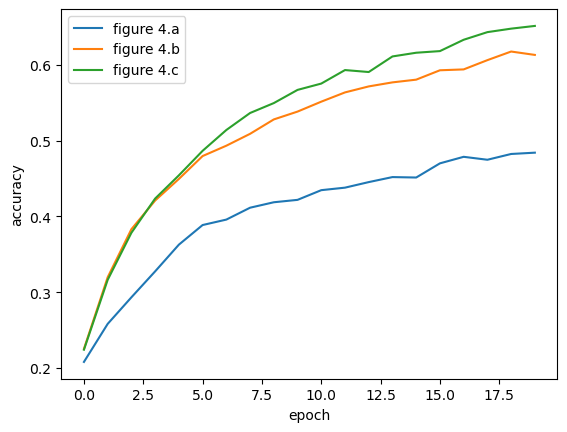

In [42]:
import numpy as np 
# print(np.arange(0, len(acc_per_hyper_param[0])))
# print(acc_per_hyper_param[0])
plt.plot(np.arange(0, len(acc_per_hyper_param[0])), acc_per_hyper_param[0], label="figure 4.a")
plt.plot(np.arange(0, len(acc_per_hyper_param[1])), acc_per_hyper_param[1], label="figure 4.b")
plt.plot(np.arange(0, len(acc_per_hyper_param[2])), acc_per_hyper_param[2], label="figure 4.c")
plt.xlabel("epoch")
plt.ylabel("accuracy")
# plt.plot(np.arange(0, len(acc_per_hyper_param[1])), acc_per_hyper_param[4])
plt.legend()
plt.show()